In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [2]:
weather.sample(3)

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
2015-09-30,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.91,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.46,NaN,1151.0,NaN,NaN,1423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-08-08,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  16859 non-null  object 
 1   NAME     16859 non-null  object 
 2   ACMH     5844 non-null   float64
 3   ACSH     5844 non-null   float64
 4   AWND     8051 non-null   float64
 5   DAPR     8 non-null      float64
 6   FMTM     2190 non-null   float64
 7   FRGT     2 non-null      float64
 8   MDPR     8 non-null      float64
 9   PGTM     8512 non-null   float64
 10  PRCP     16578 non-null  float64
 11  SNOW     11380 non-null  float64
 12  SNWD     11504 non-null  float64
 13  TAVG     2037 non-null   float64
 14  TMAX     16850 non-null  float64
 15  TMIN     16849 non-null  float64
 16  TSUN     1151 non-null   float64
 17  WDF1     5844 non-null   float64
 18  WDF2     8052 non-null   float64
 19  WDF5     7965 non-null   float64
 20  WDFG     4267 non-null   float64
 21  WSF

In [4]:
df = weather[['PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD']].copy()
df.head()

,PRCP,TMAX,TMIN,SNOW,SNWD
DATE,,,,,
1960-01-01,0.0,49.0,30.0,0.0,0.0
1960-01-02,0.0,49.0,29.0,0.0,0.0
1960-01-03,0.0,54.0,35.0,0.0,0.0
1960-01-04,0.0,54.0,36.0,0.0,0.0
1960-01-05,0.0,55.0,33.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    16578 non-null  float64
 1   TMAX    16850 non-null  float64
 2   TMIN    16849 non-null  float64
 3   SNOW    11380 non-null  float64
 4   SNWD    11504 non-null  float64
dtypes: float64(5)
memory usage: 790.3+ KB


In [6]:
df.isna().sum()

PRCP     281
TMAX       9
TMIN      10
SNOW    5479
SNWD    5355
dtype: int64

In [7]:
# show it in percetage to overall data frame
df.isna().sum() / df.shape[0]

PRCP    0.016668
TMAX    0.000534
TMIN    0.000593
SNOW    0.324990
SNWD    0.317634
dtype: float64

In [8]:
df['SNOW'].value_counts()

0.0    11379
1.0        1
Name: SNOW, dtype: int64

In [9]:
df['SNWD'].value_counts()

0.0    11504
Name: SNWD, dtype: int64

In [10]:
df.drop(columns=['SNOW', 'SNWD'], inplace=True)
df

,PRCP,TMAX,TMIN
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


In [11]:
df['TMAX'].unique()

array([ 49.,  54.,  55.,  53.,  56.,  51.,  48.,  52.,  58.,  61.,  60.,
        62.,  63.,  59.,  64.,  65.,  57.,  69.,  76.,  77.,  79.,  73.,
        78.,  81.,  83.,  68.,  66.,  67.,  71.,  70.,  80.,  74.,  90.,
       107.,  84.,  75.,  86.,  88.,  72.,  85.,  92.,  82.,  91.,  93.,
        46.,  50.,  47., 104.,  94.,  89.,  97.,  95.,  87.,  40.,  45.,
        44.,  43.,  96.,  99.,  39.,  38.,  41.,  98., 100.,  nan, 122.,
       101.])

In [12]:
df['TMAX'].isna().sum()

9

In [13]:
df['TMAX'] = df['TMAX'].fillna(df['TMAX'].mean())
df['TMAX'].isna().sum()

0

In [14]:
df['TMIN'].unique()

array([30., 29., 35., 36., 33., 38., 46., 49., 43., 37., 40., 34., 41.,
       47., 51., 45., 50., 44., 42., 53., 54., 55., 48., 39., 52., 57.,
       60., 56., 58., 59., 61., 32., 31., 28., 65., 63., 64., 62., 67.,
       66., 27., 26., 68.,  7., 11., nan,  1., 18., 69.])

In [15]:
df['TMIN'].isna().sum()

10

In [16]:
df['TMIN'] = df['TMIN'].fillna(df['TMIN'].mean())
df['TMIN'].isna().sum()

0

In [17]:
df[(df['TMAX'] > 9998) | (df['TMIN'] > 9998)]

,PRCP,TMAX,TMIN
DATE,,,


In [18]:
# a better way to do this step:
df.apply(lambda x: (x==9999)).sum()

PRCP    0
TMAX    0
TMIN    0
dtype: int64

In [19]:
df['PRCP'].isna().sum()

281

In [20]:
df['PRCP'] = df['PRCP'].fillna(0)
df['PRCP'].isna().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    16859 non-null  float64
 1   TMAX    16859 non-null  float64
 2   TMIN    16859 non-null  float64
dtypes: float64(3)
memory usage: 526.8+ KB


In [22]:
df.columns

Index(['PRCP', 'TMAX', 'TMIN'], dtype='object')

In [23]:
df.index = df.index.map(pd.to_datetime) 

In [24]:
df.index.dtype

dtype('<M8[ns]')

<AxesSubplot:xlabel='DATE'>

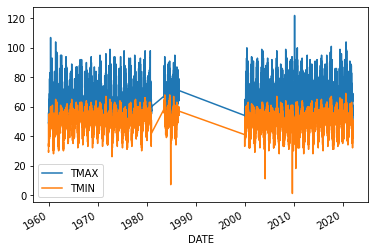

In [25]:
df[['TMAX', 'TMIN']].plot()

In [26]:
df.index.year.value_counts().sort_index(ascending=False)

2022     28
2021    364
2020    366
2019    365
2018    365
2017    365
2016    366
2015    365
2014    365
2013    365
2012    365
2011    365
2010    365
2009    365
2008    366
2007    365
2006    365
2005    365
2004    366
2003    365
2002    365
2001    365
2000    365
1986    212
1985    365
1984    366
1983    184
1980    366
1979    365
1978    365
1977    365
1976    366
1975    365
1974    365
1973    365
1972    366
1971    365
1970    365
1969    365
1968    366
1967    365
1966    365
1965    365
1964    366
1963    365
1962    365
1961    365
1960    366
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

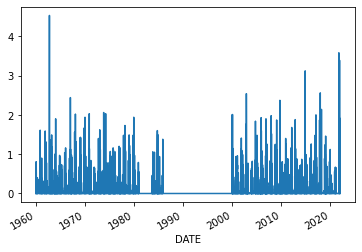

In [27]:
df['PRCP'].plot()

In [28]:
df['PRCP'].groupby(df.index.year).sum()

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: PRCP, dtype: float64

In [29]:
# goal: predict the nex days temperature
df['TARGET'] = df.shift(-1)['TMAX']
df

,PRCP,TMAX,TMIN,TARGET
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [30]:
df = df.iloc[:-1,:].copy()

In [32]:
reg = Ridge(alpha=.1)

In [33]:
predictors = ['PRCP', 'TMAX', 'TMIN']

In [34]:
train = df.loc[:'2020-12-31']
test = df.loc['2021-01-01':]

In [35]:
reg.fit(train[predictors], train['TARGET'])

Ridge(alpha=0.1)

In [36]:
predictions = reg.predict(test[predictors])

In [37]:
mean_absolute_error(test['TARGET'], predictions)

3.412551636552991

In [38]:
# currently 3.4 degrees off on average on the predictions

In [39]:
combined = pd.concat([test['TARGET'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['ACTUAL', 'PREDICTIONS']

In [40]:
combined

,ACTUAL,PREDICTIONS
DATE,,
2021-01-01,57.0,59.810226
2021-01-02,56.0,59.309068
2021-01-03,62.0,58.538513
2021-01-04,59.0,61.533190
2021-01-05,59.0,59.447504
...,...,...
2022-01-23,60.0,59.989403
2022-01-24,57.0,59.631049
2022-01-25,57.0,58.184528


<AxesSubplot:xlabel='DATE'>

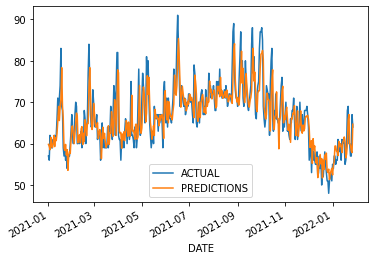

In [41]:
combined.plot()

In [42]:
reg.coef_

array([-2.20625086,  0.72107634,  0.17917696])

In [43]:
# function to omptimze the whole flow of: 1) split data 2) train the model and 3) make the prediction

def create_predictions(predictions, df, reg):
    train = df.loc[:'2020-12-31']
    test = df.loc['2021-01-01':]
    reg.fit(train[predictors], train['TARGET'])
    predictions = reg.predict(test[predictors]) 
    error = mean_absolute_error(test['TARGET'], predictions)
    combined = pd.concat([test['TARGET'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['ACTUAL', 'PREDICTIONS']
    return error, combined

In [44]:
# add additional data cols which might be usefull

In [45]:
df['MONTH_MAX'] = df['TMAX'].rolling(30).mean()

In [46]:
df

,PRCP,TMAX,TMIN,TARGET,MONTH_MAX
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000
2022-01-24,0.0,60.0,39.0,57.0,57.066667
2022-01-25,0.0,57.0,43.0,57.0,57.200000


In [47]:
df['MONTH_DAY_MAX'] = df['MONTH_MAX'] / df['TMAX']
df['MAX_MIN'] = df['TMAX'] / df['TMIN']
df

,PRCP,TMAX,TMIN,TARGET,MONTH_MAX,MONTH_DAY_MAX,MAX_MIN
DATE,,,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN,NaN,1.633333
1960-01-02,0.0,49.0,29.0,54.0,NaN,NaN,1.689655
1960-01-03,0.0,54.0,35.0,54.0,NaN,NaN,1.542857
1960-01-04,0.0,54.0,36.0,55.0,NaN,NaN,1.500000
1960-01-05,0.0,55.0,33.0,53.0,NaN,NaN,1.666667
...,...,...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000,0.948333,1.463415
2022-01-24,0.0,60.0,39.0,57.0,57.066667,0.951111,1.538462
2022-01-25,0.0,57.0,43.0,57.0,57.200000,1.003509,1.325581


In [48]:
df = df.iloc[30:,:].copy()

In [49]:
predictors = ['PRCP', 'TMAX', 'TMIN', 'MONTH_MAX', 'MONTH_DAY_MAX', 'MAX_MIN']

In [50]:
error, comb = create_predictions(predictors, df, reg)

In [51]:
error

3.358194080492243

<AxesSubplot:xlabel='DATE'>

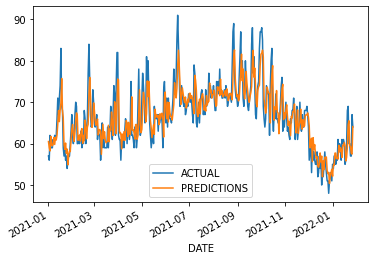

In [52]:
comb.plot()

In [53]:
# add monthly and day averages
df['MONTHLY_AVG'] = df['TMAX'].groupby(df.index.month).apply(lambda x: x.expanding(1).mean())

In [54]:
df

,PRCP,TMAX,TMIN,TARGET,MONTH_MAX,MONTH_DAY_MAX,MAX_MIN,MONTHLY_AVG
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955


In [55]:
df.index.dayofyear

Int64Index([31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
            ...
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64', name='DATE', length=16828)

In [57]:
df['DAY_OF_THE_YEAR_AVG'] = df['TMAX'].groupby(df.index.dayofyear).apply(lambda x: x.expanding(1).mean())

In [62]:
predictors = ['PRCP', 'TMAX', 'TMIN', 'MONTH_MAX', 'MONTH_DAY_MAX', 'MAX_MIN', 'MONTHLY_AVG', 'DAY_OF_THE_YEAR_AVG']

In [63]:
error, comb = create_predictions(predictors, df, reg)

In [64]:
error

3.315473355241009

<AxesSubplot:xlabel='DATE'>

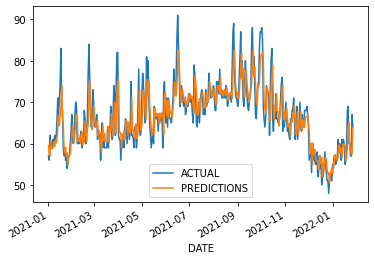

In [65]:
comb.plot()

In [66]:
reg.coef_

array([ -0.90214162,   0.39437694,   0.0300061 ,   0.34302917,
       -16.44519831,   0.04846557,   0.14372222,   0.08123609])

In [67]:
df.corr()['TARGET']

PRCP                  -0.205516
TMAX                   0.821256
TMIN                   0.595239
TARGET                 1.000000
MONTH_MAX              0.686288
MONTH_DAY_MAX         -0.421721
MAX_MIN                0.045402
MONTHLY_AVG            0.689765
DAY_OF_THE_YEAR_AVG    0.712327
Name: TARGET, dtype: float64

In [68]:
comb['DIFF'] = (comb['ACTUAL'] - comb['PREDICTIONS']).abs()

In [69]:
comb

,ACTUAL,PREDICTIONS,DIFF
DATE,,,
2021-01-01,57.0,59.565495,2.565495
2021-01-02,56.0,57.587107,1.587107
2021-01-03,62.0,56.950429,5.049571
2021-01-04,59.0,60.727234,1.727234
2021-01-05,59.0,58.894120,0.105880
...,...,...,...
2022-01-23,60.0,59.349641,0.650359
2022-01-24,57.0,59.313913,2.313913
2022-01-25,57.0,57.433388,0.433388


In [70]:
comb.sort_values("DIFF", ascending=False).head()

,ACTUAL,PREDICTIONS,DIFF
DATE,,,
2021-01-17,83.0,68.578287,14.421713
2021-05-07,81.0,67.780620,13.219380
2021-04-01,62.0,75.159406,13.159406
2021-02-22,84.0,71.157736,12.842264
2021-10-16,66.0,78.819343,12.819343
